In [8]:
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
import sys, gc
sys.path.append('/Volumes/GoogleDrive/My Drive/ASU/Codes/PythonCode/modules')
import sfr
import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from IPython import display

from scipy.interpolate import interp1d
mpl.style.use('default')

import seaborn as sns
sns.set(color_codes=True)
sns.set(style="whitegrid", font_scale=2, color_codes=True)
sns.set_style({'axes.edgecolor': '0.0','axes.linewidth': 2.0})

from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
import astropy 


plt.rcParams['figure.figsize'] = (13,11)
plt.rcParams.update({'font.size': 22, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']
mpl.__version__

'2.2.2'

In [9]:
# Setup the cosmology used in the runs
# This provides comoving distance, lumin distance, etc... 
cosmo = FlatLambdaCDM(H0=71, Om0=0.267, Ob0=0.0449,name='myCosmo')

In [10]:
cosmo.age([7.5,10.0,12.5,15]).to('Myr')

<Quantity [ 713.81107523, 484.55407832, 356.08250343, 275.71487635] Myr>

In [11]:
madz = np.array([4.9,5.9,7,7.9])
madlogy = np.array([-1.42, -1.65, -1.79, -2.09])
maderrs = np.array([.06,.08,.1,.11])
madsfr = 10**madlogy

# Error bars
# We need the lengths of each error bar so we have to subtract smaller value from larger...
lower = 10**madlogy-10**(madlogy-maderrs)
upper = 10**(madlogy+maderrs)-10**madlogy
#upper = np.array([0,0,0,0])

madyerr = [lower,upper] 

In [12]:
finkelInt    = np.genfromtxt("/Users/earnric/Dropbox (ASU)/RAMSES-output/12Mpc-n.48-eps20-output/finkelInt.txt",
                             names=True)

In [13]:
def logErrFix(dp, dx):
    return np.abs((10**dx-1.0)*dp)

In [14]:
finkelInt

array([(5.857, -1.493, -0.038, 0.038), (6.112, -1.536, -0.04, 0.04),
       (6.33, -1.564, -0.039, 0.039), (6.612, -1.604, -0.04, 0.04),
       (7.025, -1.66, -0.039, 0.039), (7.379, -1.694, -0.044, 0.044),
       (7.846, -1.75, -0.052, 0.052), (8.208, -1.785, -0.055, 0.055),
       (8.556, -1.83, -0.071, 0.071), (8.938, -1.865, -0.061, 0.061),
       (9.186, -1.882, -0.064, 0.064), (9.49, -1.893, -0.067, 0.067),
       (10.0, -1.9, -0.088, 0.088)], 
      dtype=[('x', '<f8'), ('y', '<f8'), ('ym', '<f8'), ('yp', '<f8')])

In [15]:

plt_range = [5.75,22.0]
# tix_range = range(6,23,1)
y_range = [10**-6.95,10**-0.5]
def axSetup(ax):
    ax.set_yscale('log')
    ax.set_xlim(plt_range)
    ax.set_ylim(y_range)

    ax.yaxis.set_major_formatter(custom_formatter)

    ax.set_xlabel("redshift", size=28)
    ax.set_ylabel(r'log SFRD [$M_{\odot}/{\rm yr/Mpc}^{3}$]', size=28)
    ax.set_xticks(tix_range)


    ax.xaxis.set_tick_params(which='both',width=1,length=6,direction='in',labelsize=28)
    ax.yaxis.set_tick_params(which='major',width=1,length=6,direction='in',labelsize=28)
    ax.yaxis.set_tick_params(which='minor',width=1,length=4,direction='in')
    # ax.tick_params(width=1,length=6,which='major')
    ax.yaxis.set_tick_params(width=1,length=4,which='minor')
    return

def axFinalize(ax):
    theLeg = plt.legend(loc=1, fontsize=22,framealpha=0.55)
    theLeg.get_frame().set_linewidth(0.0)
    theLeg.set_frame_on(True)
    plt.gca().add_artist(theLeg)
    plt.gca().set_alpha(0.45)

    ax2 = ax.twiny()
    ax2.set_xlim(plt_range)
    ax2.set_xticks(tix_range)   # Set the location of the tics same as for ax
    ax2Xs = cosmo.age(tix_range).to('Myr') # Convert M_ab -> m_ab
    ax2.set_xticklabels(["{:.0f}".format(i) for i in ax2Xs.value])
    ax2.grid(b=None)
    ax2.xaxis.set_tick_params(direction='out')
    ax2.xaxis.set_tick_params(which='major',width=1,length=4,direction='out')
    ax2.get_xaxis().set_tick_params(labelsize=20)
    ax2.tick_params(axis='x', which='major', pad=1)
    ax2.set_xlabel("Time since Big Bang (Myr)", size=24)
    return 

In [16]:
from matplotlib.ticker import FuncFormatter
# ##########################################################
# Format tick labels using their exponent only... 
# ##########################################################
def formatter(x,pos):
    return format(np.log10(x), '.0f')

custom_formatter = FuncFormatter(formatter)


In [17]:
fid    = sfr.SFR(prefix="/Users/earnric/Dropbox/RAMSES-output/12Mpc-n1.0-eps01-fek1-del200-rb300-newICs/",size=12.0)
fid.load(file='StarParticle-12Mpc-n1.0-eps01-fek1-del200-rb300-newICs.txt')

Z4sfrd    = sfr.SFR(prefix="./Z-4/",size=12.0)
Z4sfrd.load(file='StarData-Z-4.txt')

Z6sfrd    = sfr.SFR(prefix="./Z-6/",size=12.0)
Z6sfrd.load(file='StarData-Z-6.txt')

SN05sfrd    = sfr.SFR(prefix="./SN05/",size=12.0)
SN05sfrd.load(file='StarParticle-12Mpc-SN05.txt')

fw1sfrd    = sfr.SFR(prefix="./fw1/",size=12.0)
fw1sfrd.load(file='StarParticle-fw1.txt')

p3snsfrd    = sfr.SFR(prefix="./p3SN/",size=12.0)
p3snsfrd.load(file='StarData-P3SN.txt')


In [18]:
# Difference between classical and enhanced P3 SRFD
diffZ4 = np.array(np.log10(Z4sfrd.sfrdP3) - np.log10(Z4sfrd.sfrdCP3))
diffZ6 = np.array(np.log10(Z6sfrd.sfrdP3) - np.log10(Z6sfrd.sfrdCP3))
difffid = np.array(np.log10(fid.sfrdP3) - np.log10(fid.sfrdCP3))
diffp3sn = np.array(np.log10(p3snsfrd.sfrdP3) - np.log10(p3snsfrd.sfrdCP3))

print(diffZ4," ", diffZ4[np.isfinite(diffZ4)].mean())
print(diffZ6," ", diffZ6[np.isfinite(diffZ6)].mean())
print(difffid," ", difffid[np.isfinite(difffid)].mean())
print(diffp3sn," ", diffp3sn[np.isfinite(diffp3sn)].mean())
print(np.array([diffZ4[np.isfinite(diffZ4)].mean(),diffZ6[np.isfinite(diffZ6)].mean(),diffp3sn[np.isfinite(diffp3sn)].mean(),
     difffid[np.isfinite(difffid)].mean()]).mean() )

[ 0.          0.31838374  0.17980536  0.46729242  0.41326785  0.31581154
  0.35584883  0.4218465   0.43883724  0.36803122  0.43989019  0.42470991
  0.44452973  0.42538867  0.44966983  0.1709722   0.42621662  1.15908681
  0.7498369   0.62412269         nan]   0.429677411962
[ 0.          0.31237304  0.16613641  0.38989346  0.32521409  0.24731016
  0.27233307  0.30008106  0.27893103  0.30995532  0.29713434  0.15457826
  0.45280148  0.52772616  0.41244794  0.36166329]   0.300536194207
[ 0.          0.41233334  0.11812923  0.47309174  0.32884322  0.26705267
  0.27866496  0.34278284  0.32135769  0.2907171   0.36328902  0.35576759
  0.3582873   0.33991022  0.3630242   0.14355761  0.50009382  0.58780599
  0.49454515  0.42704239]   0.3383148047
[ 0.                 nan  0.18668405         nan  0.37172227  0.45276472
  0.64373903         nan  0.38735451  0.49561324         nan  0.53446039
  1.33429587  0.45758716         nan  0.14225914         nan         nan
         nan         nan]   0.4551

In [19]:
diffp3sn_fid = np.array(np.log10(fid.sfrdP3) - np.log10(p3snsfrd.sfrdP3))

print(diffp3sn," ", diffp3sn[np.isfinite(diffp3sn)].mean())

[ 0.                 nan  0.18668405         nan  0.37172227  0.45276472
  0.64373903         nan  0.38735451  0.49561324         nan  0.53446039
  1.33429587  0.45758716         nan  0.14225914         nan         nan
         nan         nan]   0.455134580757


In [20]:
diffp3sn_fid = np.array(np.log10(fid.sfrdP3) - np.log10(p3snsfrd.sfrdP3))

print(diffp3sn," ", diffp3sn[np.isfinite(diffp3sn)].mean())

[ 0.                 nan  0.18668405         nan  0.37172227  0.45276472
  0.64373903         nan  0.38735451  0.49561324         nan  0.53446039
  1.33429587  0.45758716         nan  0.14225914         nan         nan
         nan         nan]   0.455134580757


In [21]:
# These errors are due to cosmic variance.
SFRD_1_sig = {7: 0.406709062676, 7.5:0.415, 8: 0.430064974432, 8.5: 0.463,
              9: 0.496196963466, 10: 0.524254254615,  
              11:0.549669105937, 12: 0.57237638954, 13: 0.592839726048, 
              14: 0.609861263386, 15: 0.628845320479, 16: 0.644800176731}

# Setup some arrays to plot with the 1 sigma errors listed above
sfrd_zs   = sorted(list(SFRD_1_sig.keys()))
sfrd_vals = np.array([fid.sfrd[fid.redshift == i][0] for i in sfrd_zs])
sfrd_vals_p3SN = np.array([p3snsfrd.sfrd[p3snsfrd.redshift == i][0] for i in sfrd_zs])
sfrd_errs = np.array([SFRD_1_sig[i] for i in sfrd_zs])
print(sfrd_zs)
print(sfrd_vals)
print(sfrd_errs)

[7, 7.5, 8, 8.5, 9, 10, 11, 12, 13, 14, 15, 16]
[  4.45727894e-02   4.09456218e-02   3.66467963e-02   3.37680259e-02
   1.08627762e-02   7.41805504e-03   3.59632516e-03   1.75757643e-03
   7.60981085e-04   3.39022709e-04   1.55603646e-04   8.83537451e-05]
[ 0.40670906  0.415       0.43006497  0.463       0.49619696  0.52425425
  0.54966911  0.57237639  0.59283973  0.60986126  0.62884532  0.64480018]


In [22]:
Z4sfrd.sfrd,fid.sfrd,fid.redshift

(array([  4.88660529e-08,   1.67436343e-06,   1.91185210e-05,
          4.84750742e-05,   8.99255828e-05,   1.56324587e-04,
          3.51629467e-04,   7.69495590e-04,   1.26427778e-03,
          1.75441877e-03,   2.52096070e-03,   3.59457724e-03,
          5.14070716e-03,   7.37867738e-03,   9.03882086e-03,
          9.13623989e-03,   3.62293794e-02,   3.35893720e-02,
          3.71937570e-02,   3.39392873e-02,   6.45284601e-02]),
 array([  4.91118113e-08,   9.58282095e-07,   2.14319746e-05,
          4.47036031e-05,   8.83537451e-05,   1.55603646e-04,
          3.39022709e-04,   7.60981085e-04,   1.29808257e-03,
          1.75757643e-03,   2.55115278e-03,   3.59632516e-03,
          5.20947716e-03,   7.41805504e-03,   9.17168793e-03,
          1.08627762e-02,   3.37680259e-02,   3.66467963e-02,
          4.09456218e-02,   4.45727894e-02]),
 array([ 19.86,  19.  ,  18.  ,  16.99,  16.  ,  15.  ,  14.  ,  13.  ,
         12.5 ,  12.  ,  11.5 ,  11.  ,  10.5 ,  10.  ,   9.5 ,   9.  ,
  

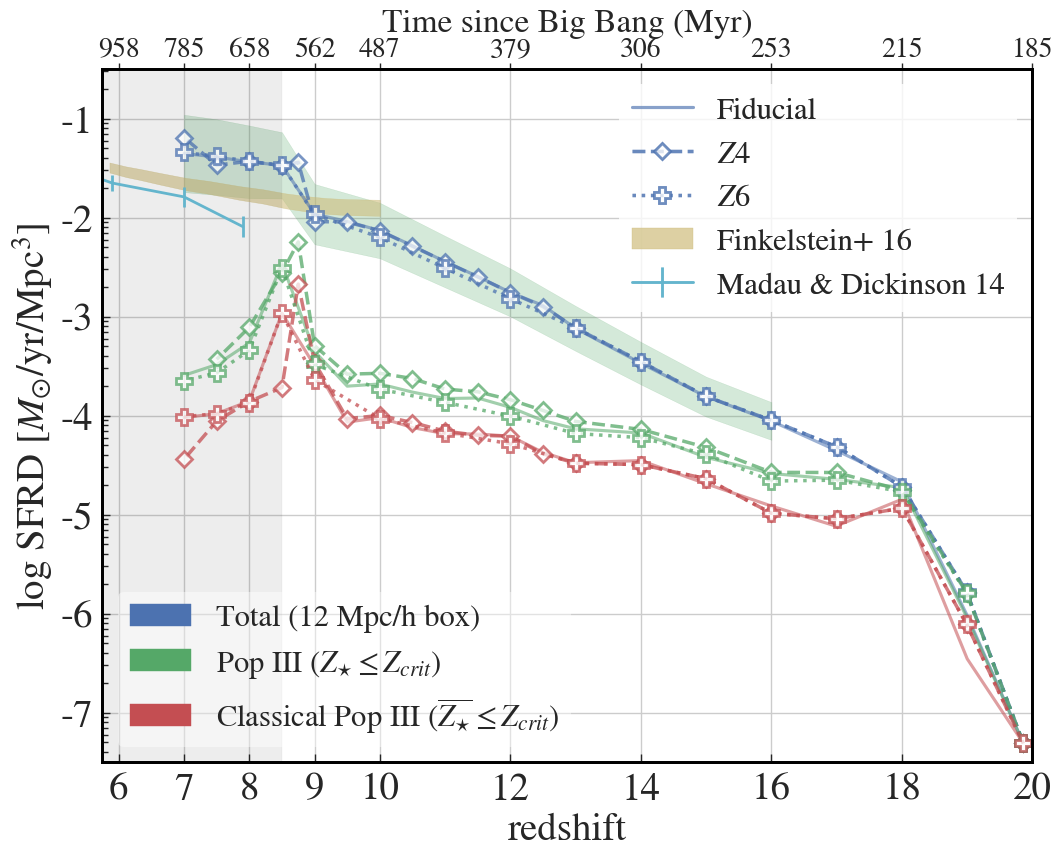

14635

In [16]:
# FuncFormatter class instance defined from the function above
# # custom_formatter = FuncFormatter(formatter)

plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['font.size'] = 22
 
plt_range = [5.75,20.0]
tix_range = range(6,21,1)
tix_range = [6,7,8,9,10,12,14,16,18,20]
y_range = [10**-7.5,10**-0.5]

fig, ax = plt.subplots(figsize=(12,9))

# Build and add a color legend for the types of data plotted
tot = mpatches.Patch(color='C0', label='Total (12 Mpc/h box)')
p3  = mpatches.Patch(color='C1', label='Pop III $(Z_{\star} \leq Z_{crit})$')
cp3 = mpatches.Patch(color='C2', label='Classical Pop III $(\overline{Z_{\star}} \leq Z_{crit})$')
# ax.annotate("12Mpc (46pc/h)",xy=(10, 0.1))
# ax.annotate("3Mpc Low Res (46pc/h)",xy=(15, 0.03))
keyLeg = plt.legend(loc=3, fontsize=22, handles=[tot, p3, cp3],framealpha=0.45)
keyLeg.get_frame().set_linewidth(0.0)
keyLeg.set_frame_on(True)
plt.gca().add_artist(keyLeg)


axSetup(ax)

ax.fill_between(sfrd_zs,sfrd_vals/sfrd_errs, sfrd_vals*sfrd_errs,
                color='C1', alpha=0.25)
# ax.fill_between(sfrd_zs,sfrd_vals_p3SN/sfrd_errs, sfrd_vals_p3SN*sfrd_errs,
#                 color=new_colors[8], alpha=0.25)

ax.errorbar(madz,madsfr, yerr = madyerr, fmt='c-', linewidth = 2.0, alpha=1.0, label='Madau & Dickinson 14')

ax.fill_between(finkelInt['x'],10**(finkelInt['y']+logErrFix(finkelInt['y'],finkelInt['y']/100)),
                10**(finkelInt['y']-logErrFix(finkelInt['y'],finkelInt['y']/100)),
                color='C4', alpha=0.55, label='Finkelstein+ 16')

ax.plot(fid.redshift,fid.sfrd, 'C0-', 
        markersize=8,linewidth = 2.25, alpha=0.55,
        label='Fiducial') 
ax.plot(fid.redshift,fid.sfrdP3, 'C1-', linewidth = 2.25, alpha=0.55)
ax.plot(fid.redshift,fid.sfrdCP3, 'C2-', linewidth = 2.25, alpha=0.55)

ax.plot(Z4sfrd.redshift,Z4sfrd.sfrd, 'C0D--', markeredgewidth=2.0, markerfacecolor='w', 
        markersize=8, linewidth = 2.5, alpha=0.75,
        label='$Z4$') 
ax.plot(Z4sfrd.redshift,Z4sfrd.sfrdP3, 'C1D--', markeredgewidth=2.0,
        linewidth = 2.5,markerfacecolor='w',markersize=8, alpha=0.75)
ax.plot(Z4sfrd.redshift,Z4sfrd.sfrdCP3, 'C2D--', markeredgewidth=2.0,
        linewidth = 2.5,markerfacecolor='w',markersize=8, alpha=0.75)

ax.plot(Z6sfrd.redshift,Z6sfrd.sfrd, 'C0P:', markeredgewidth=2.0, markerfacecolor='w', 
        markersize=12,linewidth = 2.5, alpha=0.75,
        label='$Z6$') 
ax.plot(Z6sfrd.redshift,Z6sfrd.sfrdP3, 'C1P:', markeredgewidth=2.0,
        linewidth = 2.5, markerfacecolor='w', markersize=12,alpha=0.75)
ax.plot(Z6sfrd.redshift,Z6sfrd.sfrdCP3, 'C2P:', markeredgewidth=2.0,
        linewidth = 2.5, markerfacecolor='w', markersize=12,alpha=0.75)

# ax.plot(SN05sfrd.redshift,SN05sfrd.sfrd, 'C0d--', 
#         markersize=8,linewidth = 2.5, alpha=0.75,
#         label='SN 1/2') 
# ax.plot(SN05sfrd.redshift,SN05sfrd.sfrdP3, 'C1d--', linewidth = 1.5, alpha=0.75)
# ax.plot(SN05sfrd.redshift,SN05sfrd.sfrdCP3, 'C2d--', linewidth = 1.5, alpha=0.75)

# ax.plot(fw1sfrd.redshift,fw1sfrd.sfrd, 'C0s-.', markeredgewidth=2.0,
#         markersize=10,linewidth = 2.0, alpha=0.55,  markerfacecolor='w',
#         label='fw1') 
# ax.plot(fw1sfrd.redshift,fw1sfrd.sfrdP3, 'C1s-.',  markersize=10, markeredgewidth=2.0,
#         markerfacecolor='w', linewidth = 1., alpha=0.45)
# ax.plot(fw1sfrd.redshift,fw1sfrd.sfrdCP3, 'C2s-.', markersize=10, markeredgewidth=2.0,
#         markerfacecolor='w', linewidth = 1., alpha=0.45)

# ax.plot(p3snsfrd.redshift,p3snsfrd.sfrd, 'C0o-',  markeredgewidth=2.0, markerfacecolor='w',
#         markersize=10, linewidth = 2.5, alpha=0.75,label='P3SN') 
# ax.plot(p3snsfrd.redshift,p3snsfrd.sfrdP3, 'C1o-', markersize=10,  markeredgewidth=2.0, markerfacecolor='w',
#         linewidth = 2, alpha=0.75)
# ax.plot(p3snsfrd.redshift,p3snsfrd.sfrdCP3, 'C2o-', markersize=10,  markeredgewidth=2.0, markerfacecolor='w',
#         linewidth = 2, alpha=0.75)



ax.axvspan(5.75,8.5, alpha=0.08, color='k')
# ax.annotate('reionization', xy = (0.5, 0.5), xytext = (8.2, .2), xycoords='axes fraction',
#                         textcoords = 'data', ha = 'left', va = 'bottom',fontsize=18,rotation=90)


axFinalize(ax)

plt.savefig("SFRD-proj3-1werrs.pdf",dpi=fig.dpi ,bbox_inches='tight')
plt.show()
gc.collect()

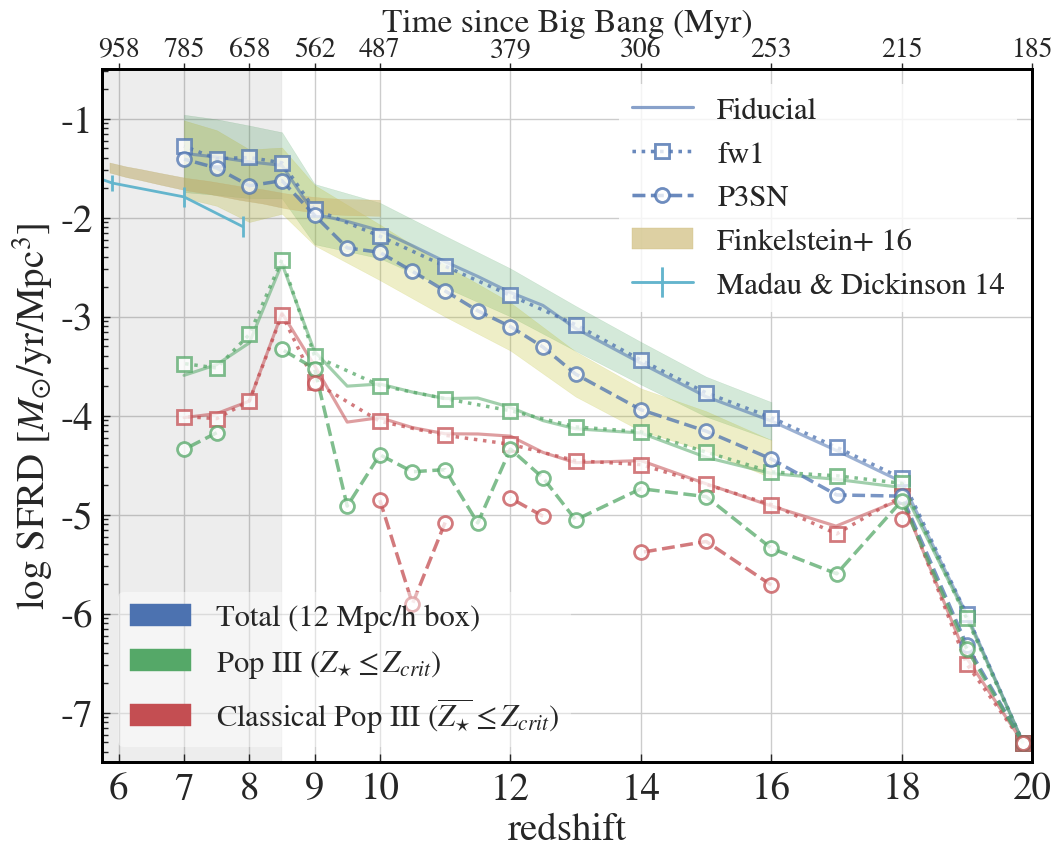

14240

In [17]:
# FuncFormatter class instance defined from the function above
# custom_formatter = FuncFormatter(formatter)

plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['font.size'] = 22
 
plt_range = [5.75,20.0]
tix_range = range(6,21,1)
tix_range = [6,7,8,9,10,12,14,16,18,20]
y_range = [10**-7.5,10**-0.5]

fig, ax = plt.subplots(figsize=(12,9))

# Build and add a color legend for the types of data plotted
tot = mpatches.Patch(color='C0', label='Total (12 Mpc/h box)')
p3  = mpatches.Patch(color='C1', label='Pop III $(Z_{\star} \leq Z_{crit})$')
cp3 = mpatches.Patch(color='C2', label='Classical Pop III $(\overline{Z_{\star}} \leq Z_{crit})$')
# ax.annotate("12Mpc (46pc/h)",xy=(10, 0.1))
# ax.annotate("3Mpc Low Res (46pc/h)",xy=(15, 0.03))
keyLeg = plt.legend(loc=3, fontsize=22, handles=[tot, p3, cp3],framealpha=0.45)
keyLeg.get_frame().set_linewidth(0.0)
keyLeg.set_frame_on(True)
plt.gca().add_artist(keyLeg)


axSetup(ax)

ax.fill_between(sfrd_zs,sfrd_vals/sfrd_errs, sfrd_vals*sfrd_errs,
                color='C1', alpha=0.25)
ax.fill_between(sfrd_zs,sfrd_vals_p3SN/sfrd_errs, sfrd_vals_p3SN*sfrd_errs,
                color=new_colors[8], alpha=0.25)

ax.errorbar(madz,madsfr, yerr = madyerr, fmt='c-', linewidth = 2.0, alpha=1.0, label='Madau & Dickinson 14')

ax.fill_between(finkelInt['x'],10**(finkelInt['y']+logErrFix(finkelInt['y'],finkelInt['y']/100)),
                10**(finkelInt['y']-logErrFix(finkelInt['y'],finkelInt['y']/100)),
                color='C4', alpha=0.55, label='Finkelstein+ 16')

ax.plot(fid.redshift,fid.sfrd, 'C0-', 
        markersize=8,linewidth = 2.25, alpha=0.55,
        label='Fiducial') 
ax.plot(fid.redshift,fid.sfrdP3, 'C1-', linewidth = 2.25, alpha=0.55)
ax.plot(fid.redshift,fid.sfrdCP3, 'C2-', linewidth = 2.25, alpha=0.55)

# ax.plot(Z4sfrd.redshift,Z4sfrd.sfrd, 'C0D--', markeredgewidth=2.0, markerfacecolor='w', 
#         markersize=8,linewidth = 2.5, alpha=0.55,
#         label='$Z4$') 
# ax.plot(Z4sfrd.redshift,Z4sfrd.sfrdP3, 'C1D--', markeredgewidth=2.0,markerfacecolor='w',markersize=8, alpha=0.45)
# ax.plot(Z4sfrd.redshift,Z4sfrd.sfrdCP3, 'C2D--', markeredgewidth=2.0,markerfacecolor='w',markersize=8, alpha=0.45)

# ax.plot(Z6sfrd.redshift,Z6sfrd.sfrd, 'C0P:', markeredgewidth=2.0, markerfacecolor='w', 
#         markersize=12,linewidth = 2.5, alpha=0.55,
#         label='$Z6$') 
# ax.plot(Z6sfrd.redshift,Z6sfrd.sfrdP3, 'C1P:', markeredgewidth=2.0,markerfacecolor='w', markersize=12,alpha=0.45)
# ax.plot(Z6sfrd.redshift,Z6sfrd.sfrdCP3, 'C2P:', markeredgewidth=2.0,markerfacecolor='w', markersize=12,alpha=0.45)

# ax.plot(SN05sfrd.redshift,SN05sfrd.sfrd, 'C0d--', 
#         markersize=8,linewidth = 2.5, alpha=0.75,
#         label='SN 1/2') 
# ax.plot(SN05sfrd.redshift,SN05sfrd.sfrdP3, 'C1d--', linewidth = 1.5, alpha=0.75)
# ax.plot(SN05sfrd.redshift,SN05sfrd.sfrdCP3, 'C2d--', linewidth = 1.5, alpha=0.75)

ax.plot(fw1sfrd.redshift,fw1sfrd.sfrd, 'C0s:', markeredgewidth=2.0,
        markersize=10,linewidth = 2.5, alpha=0.75,  markerfacecolor='w',
        label='fw1') 
ax.plot(fw1sfrd.redshift,fw1sfrd.sfrdP3, 'C1s:',  markersize=10, markeredgewidth=2.0,
        markerfacecolor='w', linewidth = 2.5, alpha=0.75)
ax.plot(fw1sfrd.redshift,fw1sfrd.sfrdCP3, 'C2s:', markersize=10, markeredgewidth=2.0,
        markerfacecolor='w', linewidth = 2.5, alpha=0.75)

ax.plot(p3snsfrd.redshift,p3snsfrd.sfrd, 'C0o--',  markeredgewidth=2.0, markerfacecolor='w',
        markersize=10, linewidth = 2.5, alpha=0.75,label='P3SN') 
ax.plot(p3snsfrd.redshift,p3snsfrd.sfrdP3, 'C1o--', markersize=10,  markeredgewidth=2.0, markerfacecolor='w',
        linewidth = 2.5, alpha=0.75)
ax.plot(p3snsfrd.redshift,p3snsfrd.sfrdCP3, 'C2o--', markersize=10,  markeredgewidth=2.0, markerfacecolor='w',
        linewidth = 2.5, alpha=0.75)



ax.axvspan(5.75,8.5, alpha=0.08, color='k')
# ax.annotate('reionization', xy = (0.5, 0.5), xytext = (8.2, .2), xycoords='axes fraction',
#                         textcoords = 'data', ha = 'left', va = 'bottom',fontsize=18,rotation=90)


axFinalize(ax)

plt.savefig("SFRD-proj3-2werrs.pdf",dpi=fig.dpi ,bbox_inches='tight')
plt.show()
gc.collect()

In [24]:

plt_range = [5.75,22.0]
# tix_range = range(6,23,1)
y_range = [10**-6.95,10**-0.5]
def axSetup_dual(ax):
    ax.set_yscale('log')
    ax.set_xlim(plt_range)
    ax.set_ylim(y_range)

    ax.yaxis.set_major_formatter(custom_formatter)

    ax.set_xticks(tix_range)

    ax.xaxis.set_tick_params(which='both',width=1,length=6,direction='in',labelsize=28)
    ax.yaxis.set_tick_params(which='major',width=1,length=6,direction='in',labelsize=28)
    ax.yaxis.set_tick_params(which='minor',width=1,length=4,direction='in')
    # ax.tick_params(width=1,length=6,which='major')
    ax.yaxis.set_tick_params(width=1,length=4,which='minor')
    return


def axFinalize_dual(ax):
#     theLeg = ax.legend(loc=1, fontsize=22,framealpha=0.55)
#     theLeg.get_frame().set_linewidth(0.0)
#     theLeg.set_frame_on(True)
#     plt.gca().add_artist(theLeg)
#     plt.gca().set_alpha(0.45)

    axt = ax.twiny()
    axt.set_xlim(plt_range)
    axt.set_xticks(tix_range)   # Set the location of the tics same as for ax
    axtXs = cosmo.age(tix_range).to('Myr') # Convert M_ab -> m_ab
    axt.set_xticklabels(["{:.0f}".format(i) for i in axtXs.value])
    axt.grid(b=None)
    axt.xaxis.set_tick_params(direction='out')
    axt.xaxis.set_tick_params(which='major',width=1,length=4,direction='out')
    axt.get_xaxis().set_tick_params(labelsize=20)
    axt.tick_params(axis='x', which='major', pad=1)

    return 

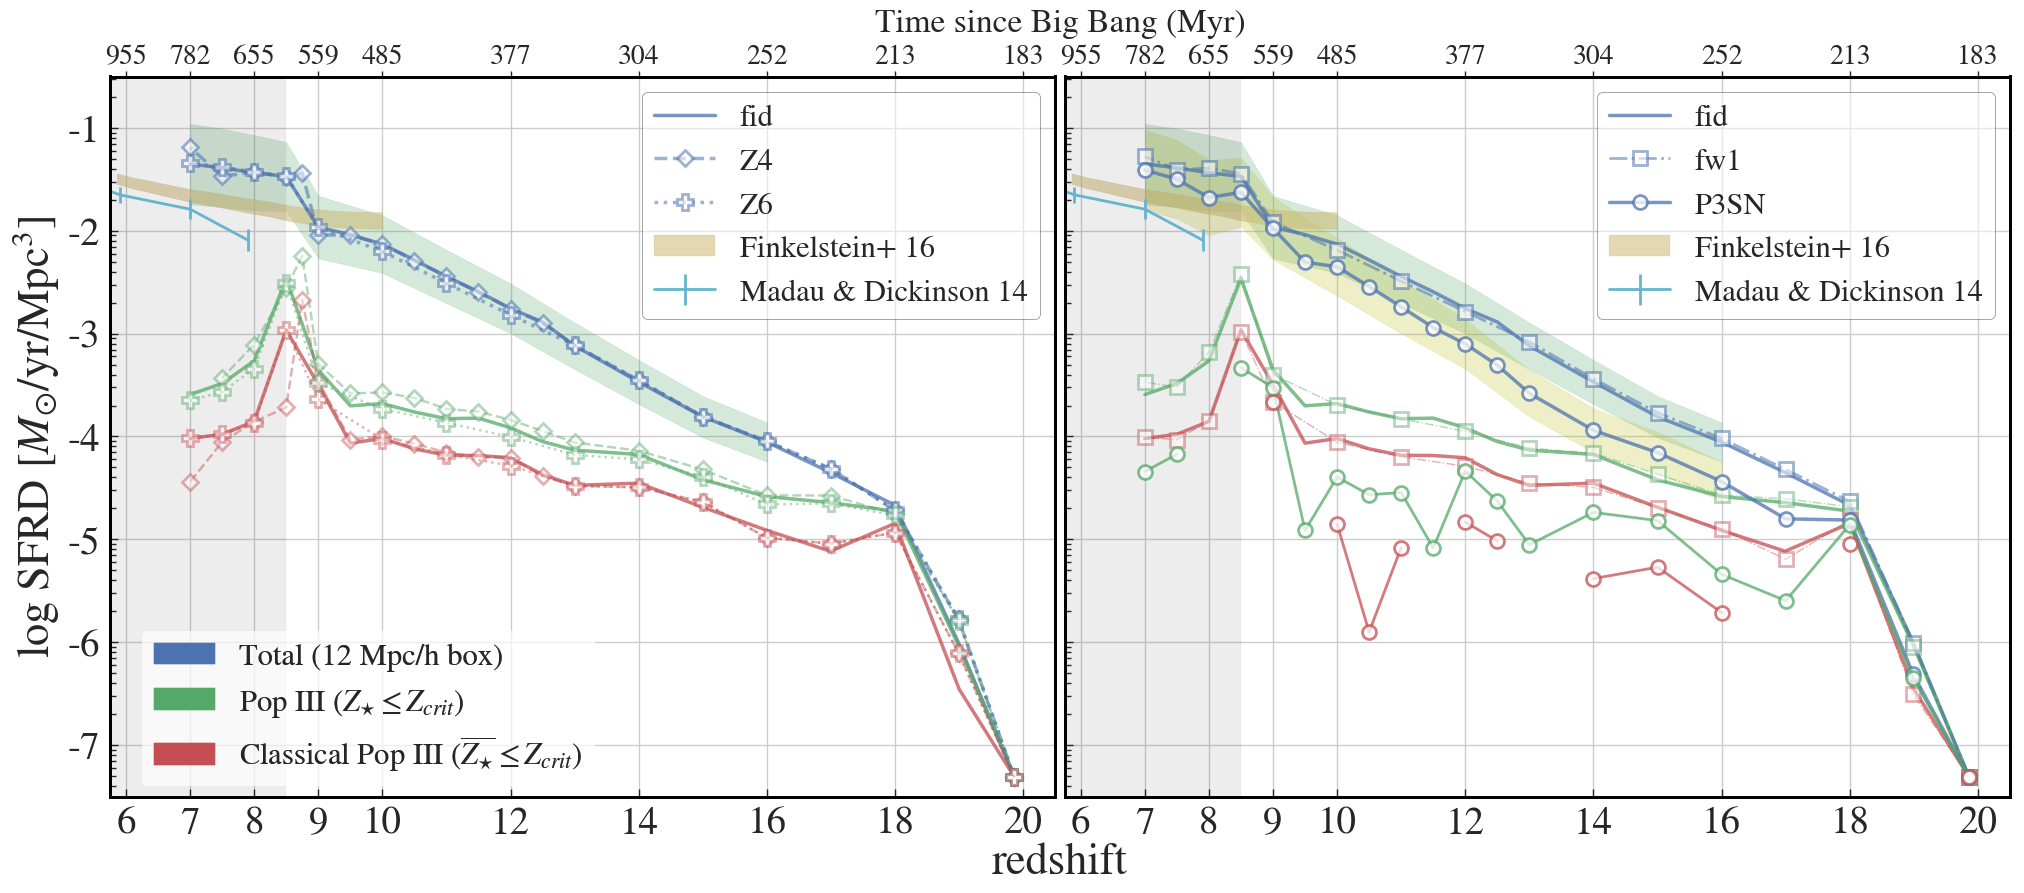

20880

In [26]:
# FuncFormatter class instance defined from the function above
# custom_formatter = FuncFormatter(formatter)

plt.rcParams['font.size'] = 22
 
plt_range = [5.75,20.5]
tix_range = range(6,21,1)
tix_range = [6,7,8,9,10,12,14,16,18,20]
y_range = [10**-7.5,10**-0.5]

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, sharey='row',squeeze=True, figsize=(20,9))

# Build and add a color legend for the types of data plotted
tot = mpatches.Patch(color='C0', label='Total (12 Mpc/h box)')
p3  = mpatches.Patch(color='C1', label='Pop III $(Z_{\star} \leq Z_{crit})$')
cp3 = mpatches.Patch(color='C2', label='Classical Pop III $(\overline{Z_{\star}} \leq Z_{crit})$')

keyLeg = fig.legend(loc=(0.07,0.12), fontsize=22, handles=[tot, p3, cp3],framealpha=0.45)
keyLeg.get_frame().set_linewidth(0.0)
keyLeg.set_frame_on(True)
plt.gca().add_artist(keyLeg)


for ax in [ax1,ax2]:
    axSetup_dual(ax)
    ax.fill_between(sfrd_zs,sfrd_vals/sfrd_errs, sfrd_vals*sfrd_errs,
                color='C1', alpha=0.25)
    if ax != ax1:
        ax.fill_between(sfrd_zs,sfrd_vals_p3SN/sfrd_errs, sfrd_vals_p3SN*sfrd_errs,
                color=new_colors[8], alpha=0.25)

    ax.errorbar(madz,madsfr, yerr = madyerr, fmt='c-', linewidth = 2.0, alpha=1.0, label='Madau & Dickinson 14')

    ax.fill_between(finkelInt['x'],10**(finkelInt['y']+logErrFix(finkelInt['y'],finkelInt['y']/100)),
                10**(finkelInt['y']-logErrFix(finkelInt['y'],finkelInt['y']/100)),
                color='C4', alpha=0.55, label='Finkelstein+ 16')

    ax.plot(fid.redshift,fid.sfrd, 'C0-', 
            markersize=8,linewidth = 2.5, alpha=0.75,
            label='fid') 
    ax.plot(fid.redshift,fid.sfrdP3, 'C1-', linewidth = 2.5, alpha=0.75)
    ax.plot(fid.redshift,fid.sfrdCP3, 'C2-', linewidth = 2.5, alpha=0.75)
#     ax.plot(fid.redshift,fid.sfrd-fid.sfrdP3, 'C9-', linewidth = 2.5, alpha=0.75)
    axFinalize_dual(ax)

ax1.plot(Z4sfrd.redshift,Z4sfrd.sfrd, 'C0D--', markeredgewidth=2.0, markerfacecolor='w', 
        markersize=8,linewidth = 2.5, alpha=0.55,
        label='Z4') 
ax1.plot(Z4sfrd.redshift,Z4sfrd.sfrdP3, 'C1D--', markeredgewidth=2.0,markerfacecolor='w',markersize=8, alpha=0.45)
ax1.plot(Z4sfrd.redshift,Z4sfrd.sfrdCP3, 'C2D--', markeredgewidth=2.0,markerfacecolor='w',markersize=8, alpha=0.45)

ax1.plot(Z6sfrd.redshift,Z6sfrd.sfrd, 'C0P:', markeredgewidth=2.0, markerfacecolor='w', 
        markersize=12,linewidth = 2.5, alpha=0.55,
        label='Z6') 
ax1.plot(Z6sfrd.redshift,Z6sfrd.sfrdP3, 'C1P:', markeredgewidth=2.0,markerfacecolor='w', markersize=12,alpha=0.45)
ax1.plot(Z6sfrd.redshift,Z6sfrd.sfrdCP3, 'C2P:', markeredgewidth=2.0,markerfacecolor='w', markersize=12,alpha=0.45)
lk = ax1.legend(loc=1, fontsize=22, scatterpoints= 1, 
               framealpha=0.55, fancybox=True, edgecolor='k' )
lk.get_frame().set_linewidth(0.5)
lk.set_frame_on(True)

# ax.plot(SN05sfrd.redshift,SN05sfrd.sfrd, 'C0d--', 
#         markersize=8,linewidth = 2.5, alpha=0.75,
#         label='SN 1/2') 
# ax.plot(SN05sfrd.redshift,SN05sfrd.sfrdP3, 'C1d--', linewidth = 1.5, alpha=0.75)
# ax.plot(SN05sfrd.redshift,SN05sfrd.sfrdCP3, 'C2d--', linewidth = 1.5, alpha=0.75)

ax2.plot(fw1sfrd.redshift,fw1sfrd.sfrd, 'C0s-.', markeredgewidth=2.0,
        markersize=10,linewidth = 2.0, alpha=0.55,  markerfacecolor='w',
        label='fw1') 
ax2.plot(fw1sfrd.redshift,fw1sfrd.sfrdP3, 'C1s-.',  markersize=10, markeredgewidth=2.0,
        markerfacecolor='w', linewidth = 1., alpha=0.45)
ax2.plot(fw1sfrd.redshift,fw1sfrd.sfrdCP3, 'C2s-.', markersize=10, markeredgewidth=2.0,
        markerfacecolor='w', linewidth = 1., alpha=0.45)

ax2.plot(p3snsfrd.redshift,p3snsfrd.sfrd, 'C0o-',  markeredgewidth=2.0, markerfacecolor='w',
        markersize=10, linewidth = 2.5, alpha=0.75,label='P3SN') 
ax2.plot(p3snsfrd.redshift,p3snsfrd.sfrdP3, 'C1o-', markersize=10,  markeredgewidth=2.0, markerfacecolor='w',
        linewidth = 2, alpha=0.75)
ax2.plot(p3snsfrd.redshift,p3snsfrd.sfrdCP3, 'C2o-', markersize=10,  markeredgewidth=2.0, markerfacecolor='w',
        linewidth = 2, alpha=0.75)
lk = ax2.legend(loc=1, fontsize=22, scatterpoints= 1, 
               framealpha=0.55, fancybox=True, edgecolor='k' )
lk.get_frame().set_linewidth(0.5)
lk.set_frame_on(True)



ax1.axvspan(5.75,8.5, alpha=0.08, color='k')
ax2.axvspan(5.75,8.5, alpha=0.08, color='k')
# ax.annotate('reionization', xy = (0.5, 0.5), xytext = (8.2, .2), xycoords='axes fraction',
#                         textcoords = 'data', ha = 'left', va = 'bottom',fontsize=18,rotation=90)


# axFinalize_dual(ax2)

plt.subplots_adjust(left=0.05, bottom=0.1, right=1.0, top=0.90, wspace=.01)

fig.text(0.525, 0.95,"Time since Big Bang (Myr)", ha='center', size=24)
fig.text(0.525, 0.015, 'redshift', ha='center',size=32 )
fig.text(0.00, 0.5, r'log SFRD [$M_{\odot}/{\rm yr/Mpc}^{3}$]',size=32,va='center', rotation='vertical')

plt.savefig("SFRD-proj3-werrs.pdf",dpi=fig.dpi ,bbox_inches='tight')
plt.show()
gc.collect()

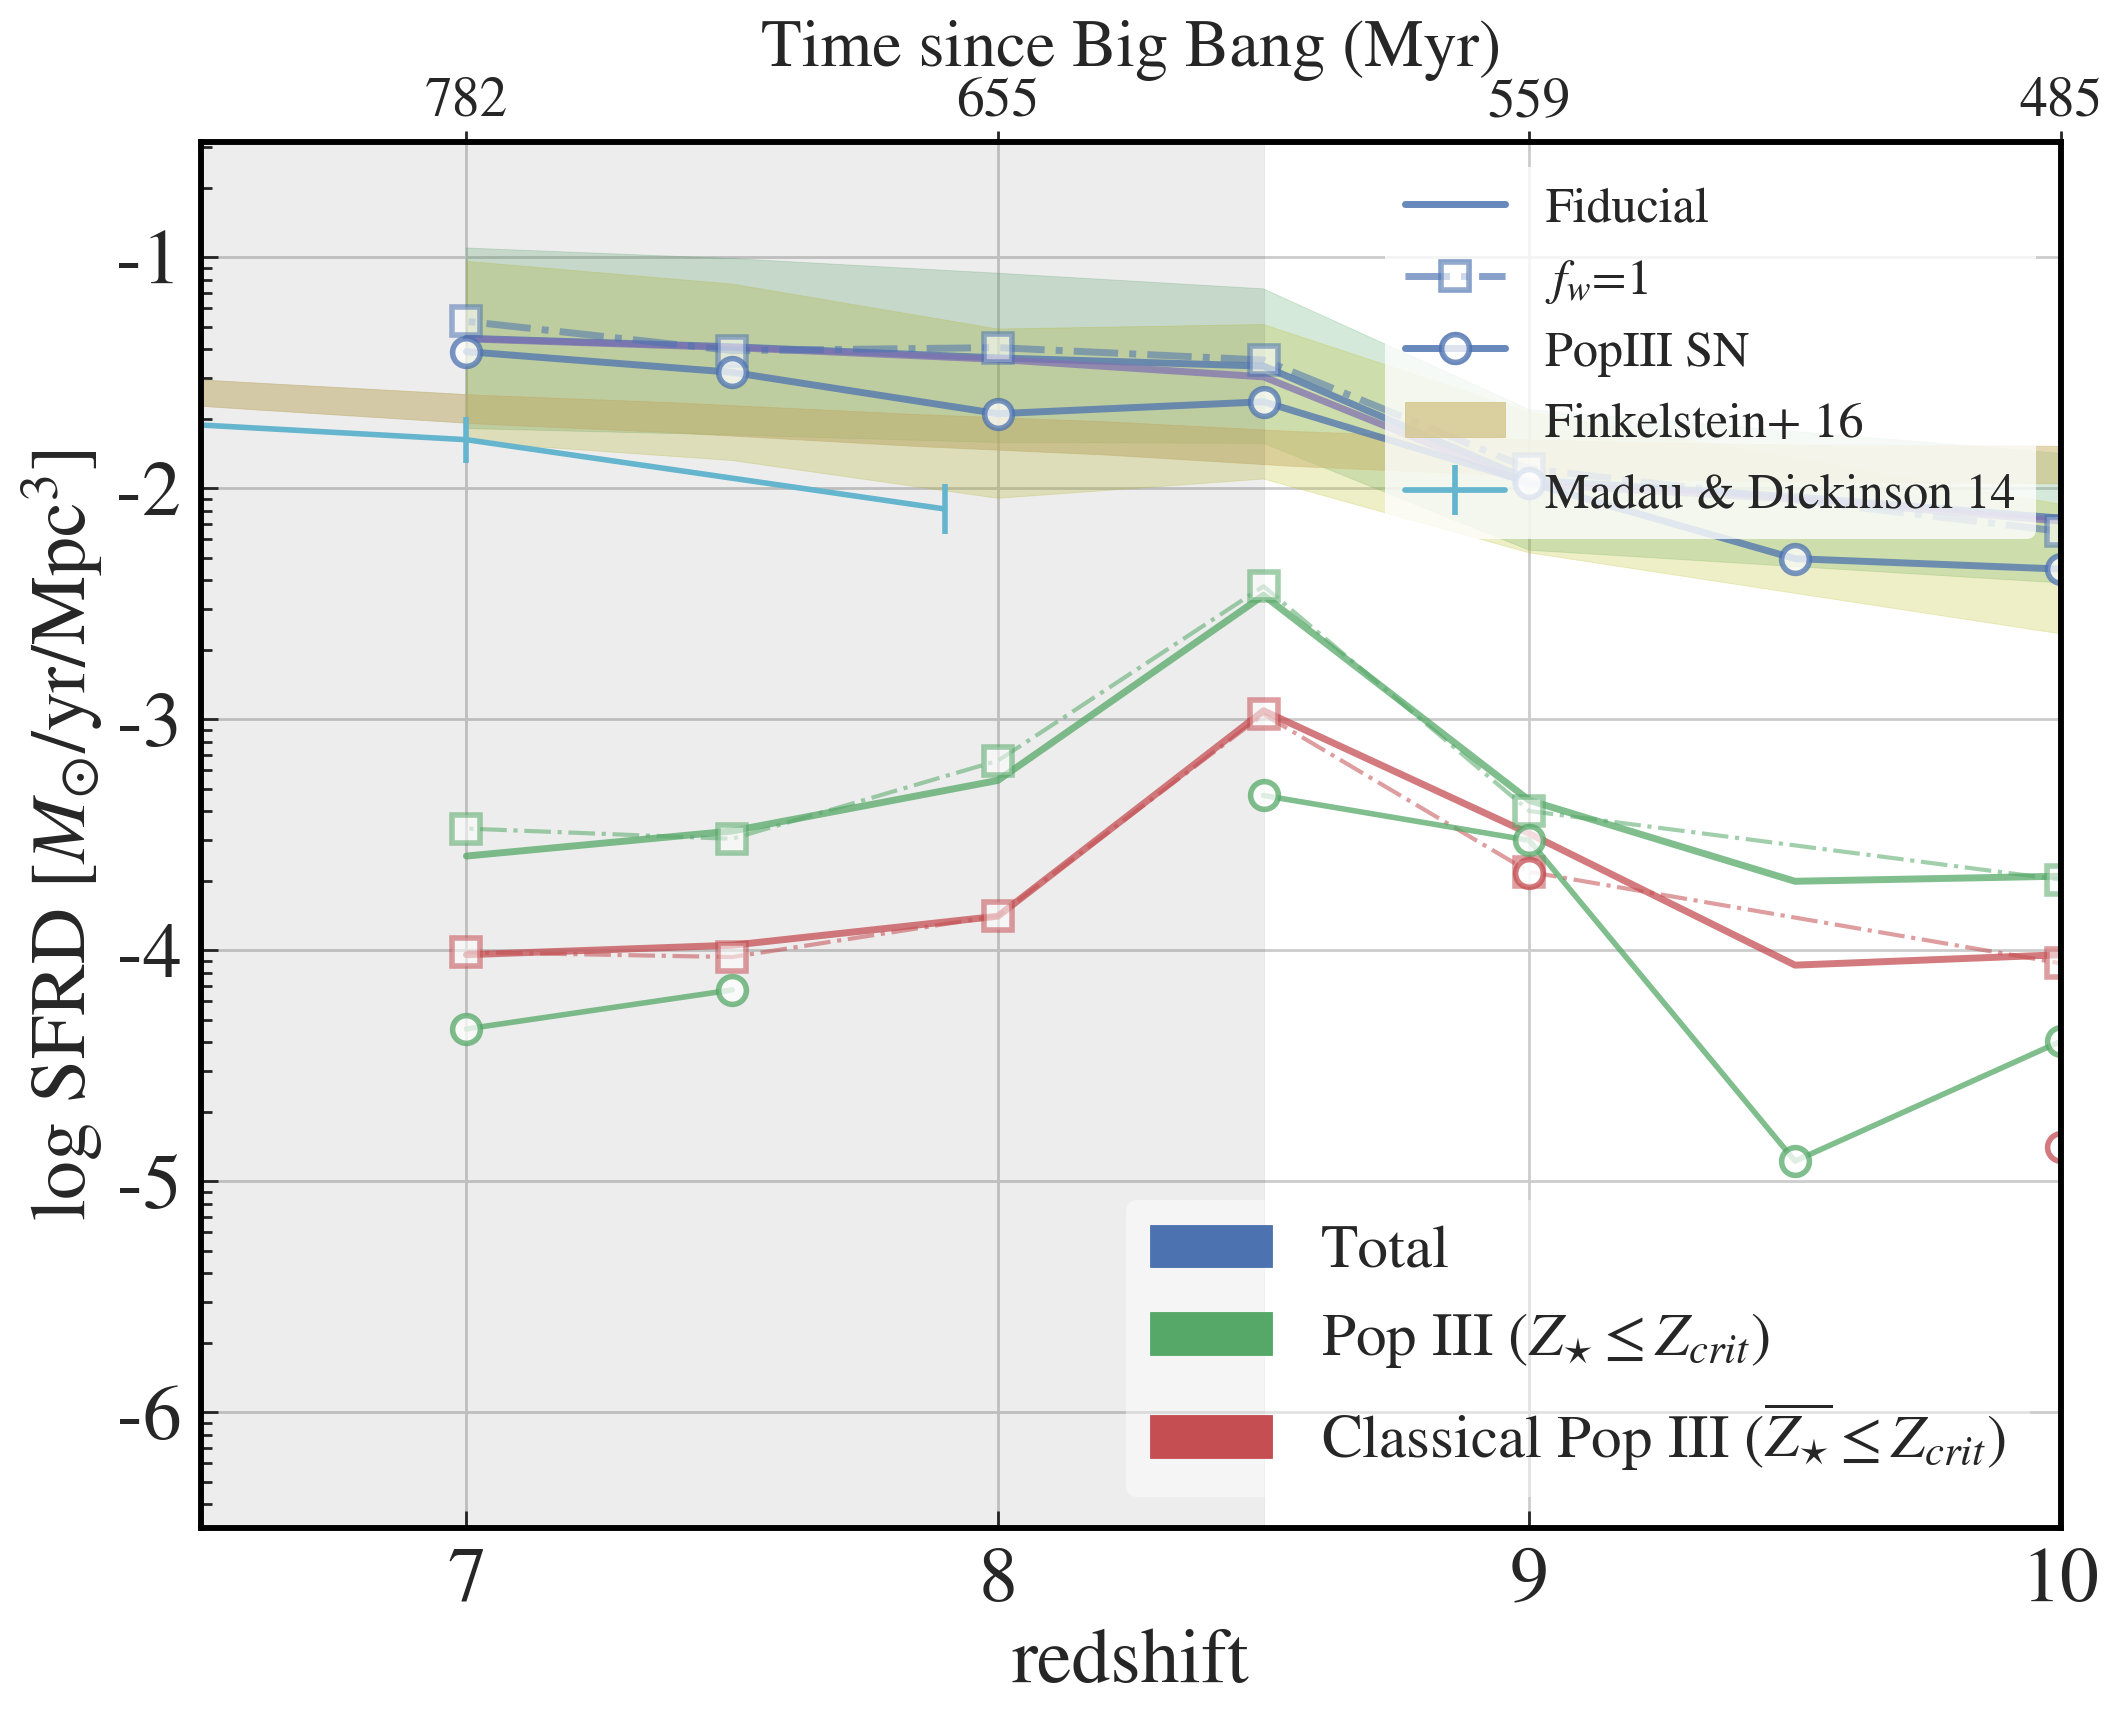

10655

In [18]:
# FuncFormatter class instance defined from the function above
# custom_formatter = FuncFormatter(formatter)

plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['font.size'] = 22
 
plt_range = [6.5,10.0]
tix_range = range(6,11,1)
tix_range = [7,8,9,10]
y_range = [10**-6.5,10**-0.5]

fig, ax = plt.subplots(figsize=(12,9))

# Build and add a color legend for the types of data plotted
tot = mpatches.Patch(color='C0', label='Total')
p3  = mpatches.Patch(color='C1', label='Pop III $(Z_{\star} \leq Z_{crit})$')
cp3 = mpatches.Patch(color='C2', label='Classical Pop III $(\overline{Z_{\star}} \leq Z_{crit})$')
# ax.annotate("12Mpc (46pc/h)",xy=(10, 0.1))
# ax.annotate("3Mpc Low Res (46pc/h)",xy=(15, 0.03))
keyLeg = plt.legend(loc=4, fontsize=22, handles=[tot, p3, cp3],framealpha=0.45)
keyLeg.get_frame().set_linewidth(0.0)
keyLeg.set_frame_on(True)
plt.gca().add_artist(keyLeg)


axSetup(ax)

ax.fill_between(sfrd_zs,sfrd_vals/sfrd_errs, sfrd_vals*sfrd_errs,
                color='C1', alpha=0.25)
ax.fill_between(sfrd_zs,sfrd_vals_p3SN/sfrd_errs, sfrd_vals_p3SN*sfrd_errs,
                color=new_colors[8], alpha=0.25)

ax.errorbar(madz,madsfr, yerr = madyerr, fmt='c-', linewidth = 2.0, alpha=1.0, label='Madau & Dickinson 14')

ax.fill_between(finkelInt['x'],10**(finkelInt['y']+logErrFix(finkelInt['y'],finkelInt['y']/100)),
                10**(finkelInt['y']-logErrFix(finkelInt['y'],finkelInt['y']/100)),
                color='C4', alpha=0.55, label='Finkelstein+ 16')

ax.plot(fid.redshift,fid.sfrd, 'C0-', 
        markersize=8,linewidth = 2.5, alpha=0.75,
        label='Fiducial') 
ax.plot(fid.redshift,fid.sfrdP3, 'C1-', linewidth = 2.5, alpha=0.75)
ax.plot(fid.redshift,fid.sfrdCP3, 'C2-', linewidth = 2.5, alpha=0.75)
ax.plot(fid.redshift,fid.sfrd-fid.sfrdP3, 'C9-', linewidth = 2.5, alpha=0.75)

# ax.plot(Z4sfrd.redshift,Z4sfrd.sfrd, 'C0D--', markeredgewidth=2.0, markerfacecolor='w', 
#         markersize=8,linewidth = 2.5, alpha=0.55,
#         label='$Z = 10^{-4}$') 
# ax.plot(Z4sfrd.redshift,Z4sfrd.sfrdP3, 'C1D--', markeredgewidth=2.0,markerfacecolor='w',markersize=8, alpha=0.55)
# ax.plot(Z4sfrd.redshift,Z4sfrd.sfrdCP3, 'C2D--', markeredgewidth=2.0,markerfacecolor='w',markersize=8, alpha=0.55)

# ax.plot(Z6sfrd.redshift,Z6sfrd.sfrd, 'C0P:', markeredgewidth=2.0, markerfacecolor='w', 
#         markersize=12,linewidth = 2.5, alpha=0.55,
#         label='$Z = 10^{-6}$') 
# ax.plot(Z6sfrd.redshift,Z6sfrd.sfrdP3, 'C1P:', markeredgewidth=2.0,markerfacecolor='w', markersize=12,alpha=0.55)
# ax.plot(Z6sfrd.redshift,Z6sfrd.sfrdCP3, 'C2P:', markeredgewidth=2.0,markerfacecolor='w', markersize=12,alpha=0.55)

# ax.plot(SN05sfrd.redshift,SN05sfrd.sfrd, 'C0d--', 
#         markersize=8,linewidth = 2.5, alpha=0.75,
#         label='SN 1/2') 
# ax.plot(SN05sfrd.redshift,SN05sfrd.sfrdP3, 'C1d--', linewidth = 1.5, alpha=0.75)
# ax.plot(SN05sfrd.redshift,SN05sfrd.sfrdCP3, 'C2d--', linewidth = 1.5, alpha=0.75)

ax.plot(fw1sfrd.redshift,fw1sfrd.sfrd, 'C0s-.', markeredgewidth=2.0,
        markersize=10,linewidth = 2.5, alpha=0.55,  markerfacecolor='w',
        label='$f_w$=1') 
ax.plot(fw1sfrd.redshift,fw1sfrd.sfrdP3, 'C1s-.',  markersize=10, markeredgewidth=2.0,
        markerfacecolor='w', linewidth = 1.5, alpha=0.55)
ax.plot(fw1sfrd.redshift,fw1sfrd.sfrdCP3, 'C2s-.', markersize=10, markeredgewidth=2.0,
        markerfacecolor='w', linewidth = 1.5, alpha=0.55)

ax.plot(p3snsfrd.redshift,p3snsfrd.sfrd, 'C0o-',  markeredgewidth=2.0, markerfacecolor='w',
        markersize=10, linewidth = 2.5, alpha=0.75,label='PopIII SN') 
ax.plot(p3snsfrd.redshift,p3snsfrd.sfrdP3, 'C1o-', markersize=10,  markeredgewidth=2.0, markerfacecolor='w',
        linewidth = 2, alpha=0.75)
ax.plot(p3snsfrd.redshift,p3snsfrd.sfrdCP3, 'C2o-', markersize=10,  markeredgewidth=2.0, markerfacecolor='w',
        linewidth = 2, alpha=0.75)



ax.axvspan(5.75,8.5, alpha=0.08, color='k')
# ax.annotate('reionization', xy = (0.5, 0.5), xytext = (8.2, .2), xycoords='axes fraction',
#                         textcoords = 'data', ha = 'left', va = 'bottom',fontsize=18,rotation=90)


axFinalize(ax)

plt.savefig("SFRD-proj3-zoom.pdf",dpi=fig.dpi ,bbox_inches='tight')
plt.show()
gc.collect()

In [19]:
# Look at increase in SFRD between z=8->9 in terms of Pop III stars.

tot_z8 = 2.27017e+10
tot_z9 = 6.57708e+09
tot_z95 = 4.53836e+09

p3_z8 = 1.12259e+09
p3_z9 = 2.56763e+08
p3_z95 = 1.73231e+08

In [20]:
tot_z8/tot_z9, (tot_z8-p3_z8)/(tot_z9-p3_z9) # Overall increase in stellar mass

(3.4516381129619833, 3.4142448867675466)

In [21]:
p3_z8/p3_z9, p3_z8/tot_z8, p3_z9/tot_z9, p3_z95/tot_z95 

(4.372086320848409,
 0.04944960069069717,
 0.03903905684589514,
 0.03817039635463031)

In [22]:
p3_to_total =np.column_stack((
    fw1sfrd.rawSFRdata[1:,0], 
    fw1sfrd.rawSFRdata[1:,4]/fw1sfrd.rawSFRdata[1:,3] # ratio of P3 mass to total
))

In [23]:
p3_to_total

array([[ 19.86      ,   1.        ],
       [ 18.99      ,   0.94722761],
       [ 18.        ,   0.89056715],
       [ 17.        ,   0.63459892],
       [ 16.        ,   0.41915332],
       [ 15.        ,   0.3258417 ],
       [ 14.        ,   0.24600857],
       [ 13.        ,   0.1523346 ],
       [ 12.        ,   0.10280335],
       [ 11.        ,   0.06949231],
       [ 10.        ,   0.04673503],
       [  9.        ,   0.03869722],
       [  8.5       ,   0.0722692 ],
       [  8.        ,   0.05009801],
       [  7.5       ,   0.03711513],
       [  7.        ,   0.02721747]])

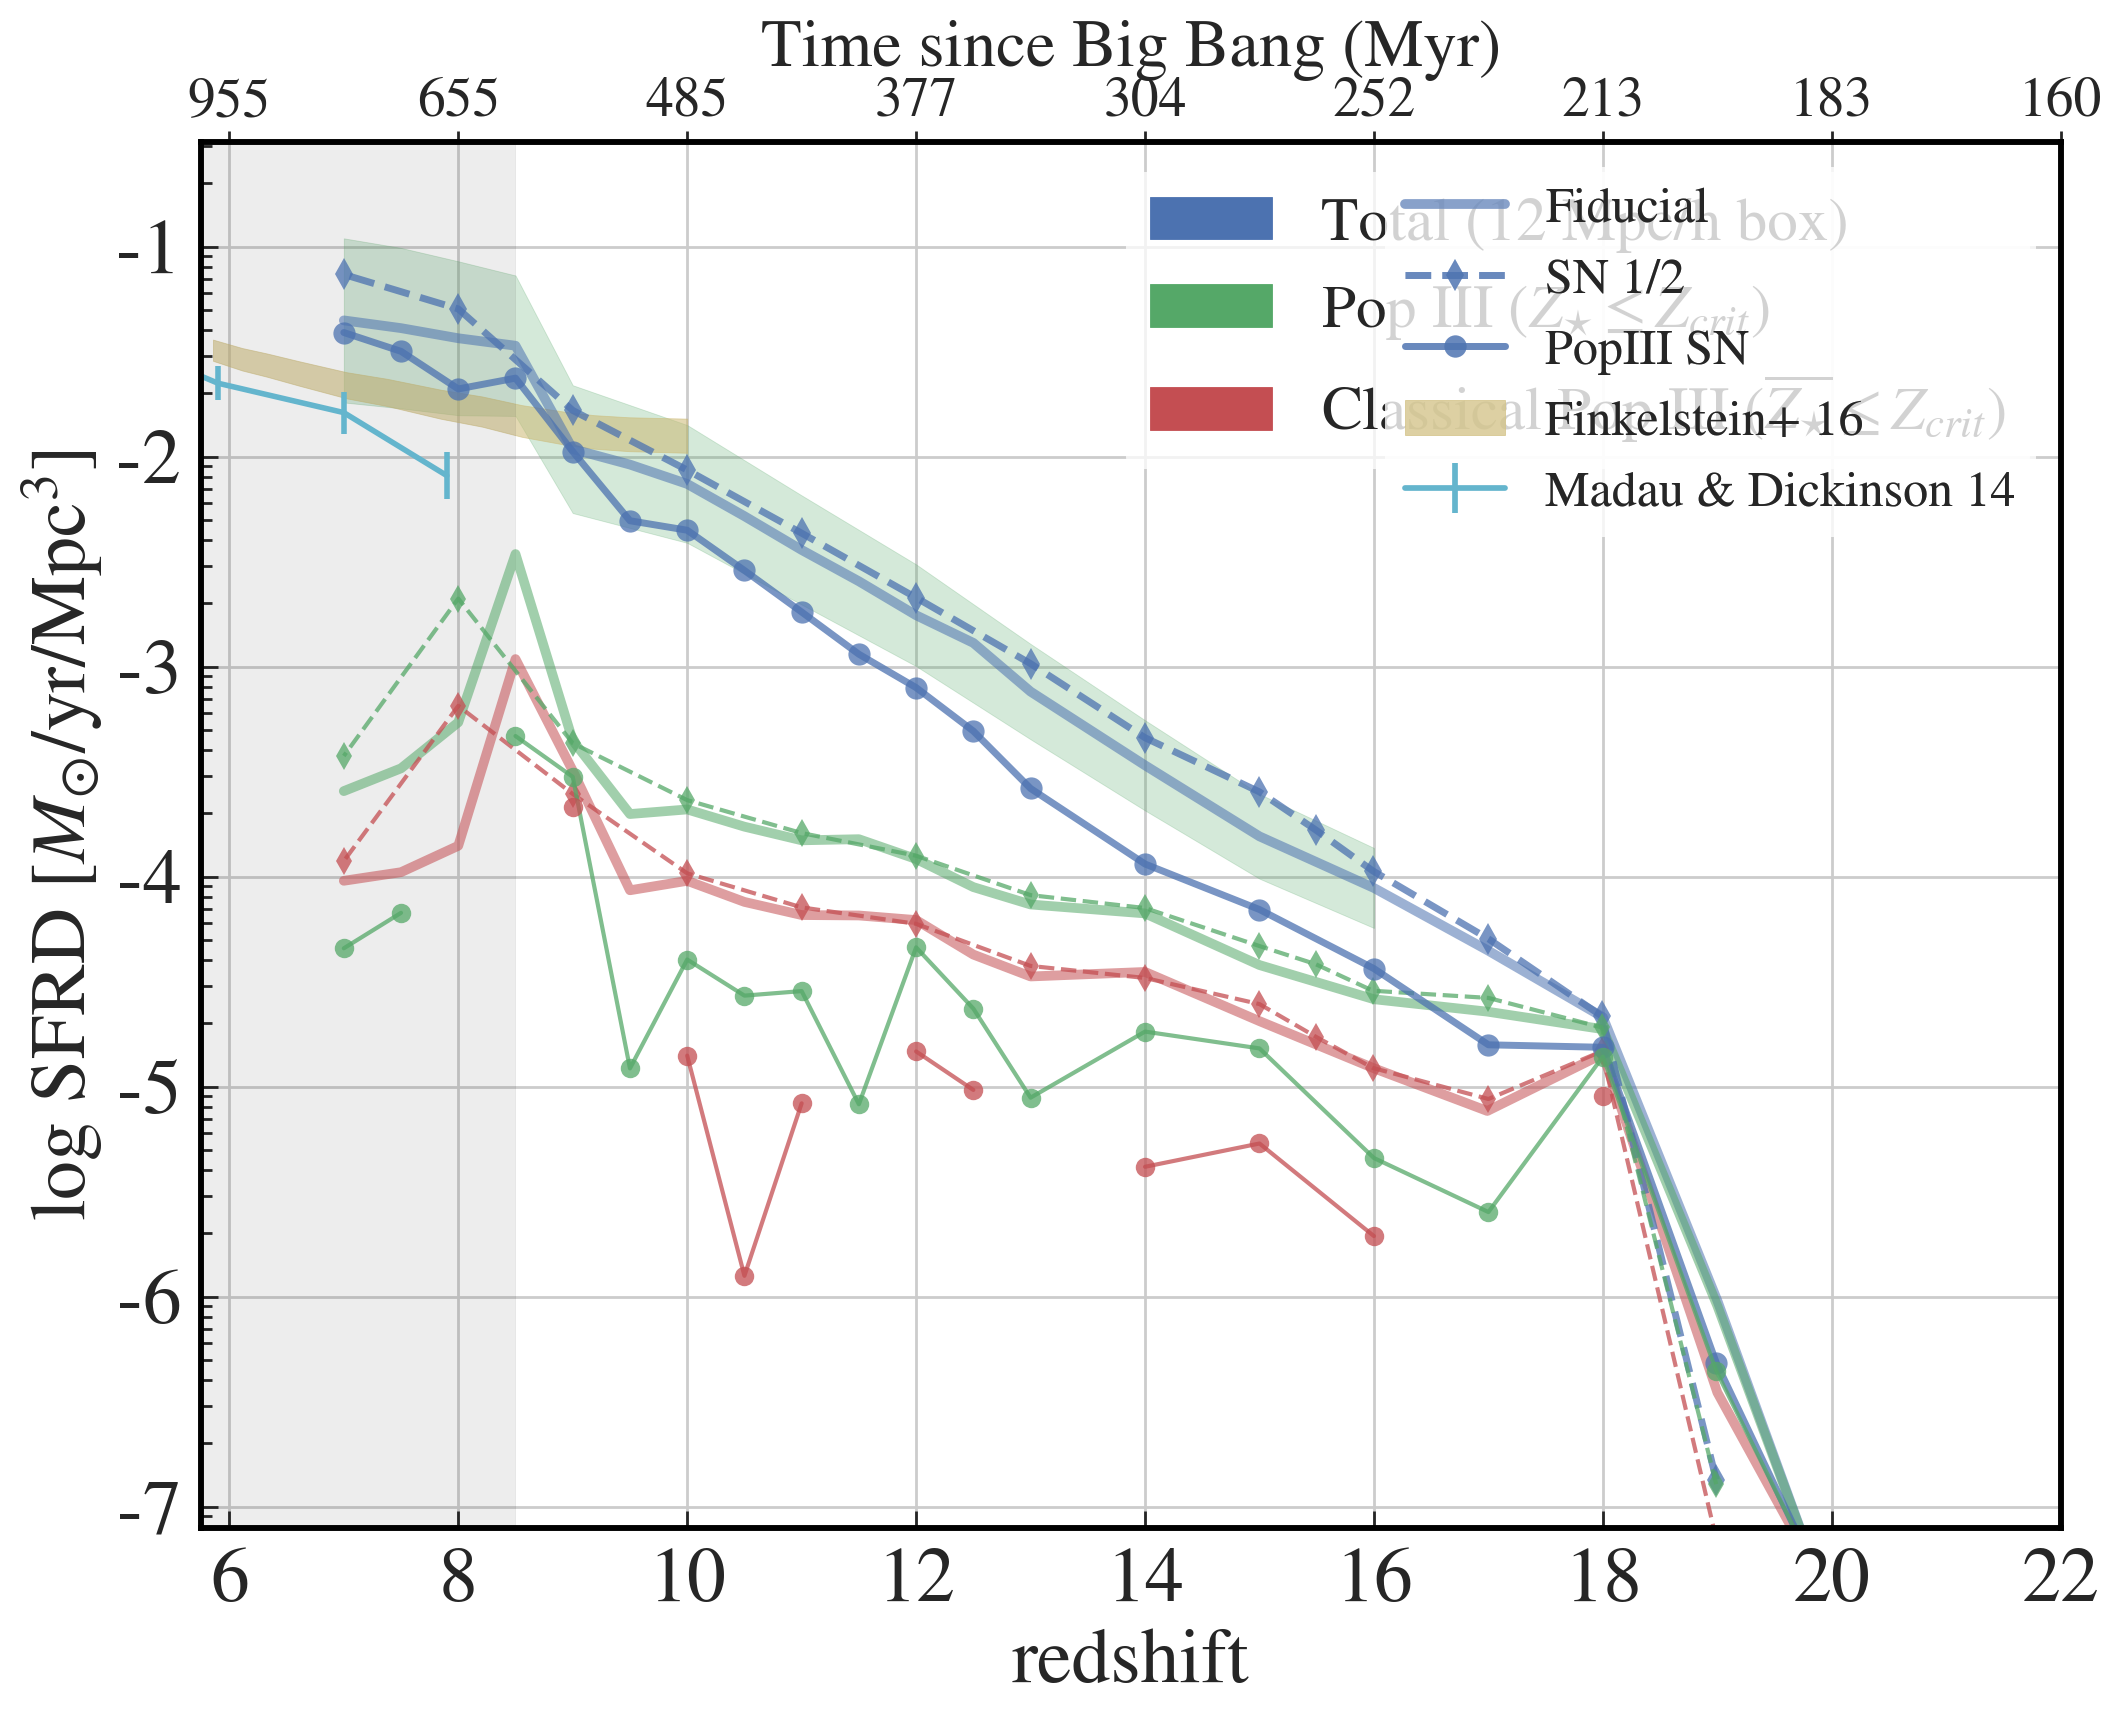

12080

In [24]:
# FuncFormatter class instance defined from the function above
# custom_formatter = FuncFormatter(formatter)

plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['font.size'] = 22
 
plt_range = [5.75,22.0]
tix_range = range(6,23,2)
y_range = [10**-7.1,10**-0.5]

fig, ax = plt.subplots(figsize=(12,9))

# Build and add a color legend for the types of data plotted
tot = mpatches.Patch(color='C0', label='Total (12 Mpc/h box)')
p3  = mpatches.Patch(color='C1', label='Pop III $(Z_{\star} \leq Z_{crit})$')
cp3 = mpatches.Patch(color='C2', label='Classical Pop III $(\overline{Z_{\star}} \leq Z_{crit})$')
# ax.annotate("12Mpc (46pc/h)",xy=(10, 0.1))
# ax.annotate("3Mpc Low Res (46pc/h)",xy=(15, 0.03))
keyLeg = plt.legend(loc=1, fontsize=22, handles=[tot, p3, cp3],framealpha=0.75)
keyLeg.get_frame().set_linewidth(0.0)
keyLeg.set_frame_on(True)
plt.gca().add_artist(keyLeg)


axSetup(ax)

ax.fill_between(sfrd_zs,sfrd_vals/sfrd_errs, sfrd_vals*sfrd_errs,
                color='C1', alpha=0.25)

ax.errorbar(madz,madsfr, yerr = madyerr, fmt='c-', linewidth = 2.0, alpha=1.0, label='Madau & Dickinson 14')

ax.fill_between(finkelInt['x'],10**(finkelInt['y']+logErrFix(finkelInt['y'],finkelInt['y']/100)),
                10**(finkelInt['y']-logErrFix(finkelInt['y'],finkelInt['y']/100)),
                color='C4', alpha=0.55, label='Finkelstein+ 16')

ax.plot(fid.redshift,fid.sfrd, 'C0-', 
        markersize=8,linewidth = 3.5, alpha=0.55,
        label='Fiducial') 
ax.plot(fid.redshift,fid.sfrdP3, 'C1-', linewidth = 3.5, alpha=0.55)
ax.plot(fid.redshift,fid.sfrdCP3, 'C2-', linewidth = 3.5, alpha=0.55)

ax.plot(SN05sfrd.redshift,SN05sfrd.sfrd, 'C0d--', 
        markersize=8,linewidth = 2.5, alpha=0.75,
        label='SN 1/2') 
ax.plot(SN05sfrd.redshift,SN05sfrd.sfrdP3, 'C1d--', linewidth = 1.5, alpha=0.75)
ax.plot(SN05sfrd.redshift,SN05sfrd.sfrdCP3, 'C2d--', linewidth = 1.5, alpha=0.75)

ax.plot(p3snsfrd.redshift,p3snsfrd.sfrd, 'C0o-', 
        markersize=8,linewidth = 2.5, alpha=0.75,
        label='PopIII SN') 
ax.plot(p3snsfrd.redshift,p3snsfrd.sfrdP3, 'C1o-', linewidth = 1.5, alpha=0.75)
ax.plot(p3snsfrd.redshift,p3snsfrd.sfrdCP3, 'C2o-', linewidth = 1.5, alpha=0.75)

ax.axvspan(5.75,8.5, alpha=0.08, color='k')
# ax.annotate('reionization', xy = (0.5, 0.5), xytext = (8.2, .2), xycoords='axes fraction',
#                         textcoords = 'data', ha = 'left', va = 'bottom',fontsize=18,rotation=90)


axFinalize(ax)

plt.savefig("SFRD-proj3-P3SN.pdf",dpi=fig.dpi ,bbox_inches='tight')
plt.show()
gc.collect()

In [25]:
(np.log10(fid.sfrdP3)-np.log10(np.ma.masked_invalid(p3snsfrd.sfrdP3))).mean()

0.64305735718586643

In [44]:
(np.log10(fid.sfrdP3)-np.log10(np.ma.masked_invalid(fid.sfrdCP3))).mean()

0.33831480469983866

In [43]:
10**.634

4.305266104917107

In [45]:
10**.33

2.137962089502232

In [46]:
# Global sfrd diff 
(np.log10(fid.sfrd)-np.log10(np.ma.masked_invalid(p3snsfrd.sfrd))).mean()

0.26421756708796951

In [47]:
10**.26

1.8197008586099834

In [56]:
(np.log10(fid.sfrd[0:4])-np.log10(np.ma.masked_invalid(p3snsfrd.sfrd[0:4]))).mean()

0.22289189494136274

In [57]:
10**.22

1.6595869074375607

In [26]:
zs = p3snsfrd.redshift
dPIII_sfrd = p3snsfrd.sfrdP3-p3snsfrd.sfrdCP3

In [27]:
P3_CP3_ratio = p3snsfrd.sfrdP3[zs<=16]/p3snsfrd.sfrdCP3[zs<=16]

In [28]:
P3_CP3_ratio.mean()

nan

In [29]:
(p3snsfrd.sfrdP3[(zs<=16) & (zs>= 8.5)]/p3snsfrd.sfrdCP3[(zs<=16) & (zs>= 8.5)]).mean()

nan

In [30]:
# Integrate the SFRD to recover the total mass in stars

In [31]:
def dt(z1,z2):
    return cosmo.age(z2).to('Myr')-cosmo.age(z1).to('Myr')
dzs = np.diff(new_n10_eps01_fek1_rb300nIC.redshift)
dt(1000,0),dzs

NameError: name 'new_n10_eps01_fek1_rb300nIC' is not defined

In [32]:
dts = dt(new_n10_eps01_fek1_rb300nIC.redshift[:-1],new_n10_eps01_fek1_rb300nIC.redshift[1:])
dts, dzs

NameError: name 'new_n10_eps01_fek1_rb300nIC' is not defined

In [33]:
dts.sum()+dt(1000,19.86) # Need to add the first interval back... z= inf -> 20.95

NameError: name 'dts' is not defined

In [34]:
# Mass in stars
(dts * new_n10_eps01_fek1_rb300nIC.sfrd[1:] * u.M_sun/ u.year * (12/0.71)**3 ).sum().to(u.M_sun)

NameError: name 'dts' is not defined

In [36]:
# The total mass in stars from the StarParticle data file
new_n10_eps01_fek1_rb300nIC.rawSFRdata[-1,3]

23233900000.0

In [34]:
cosmo.age(6)-cosmo.age(7)

<Quantity 0.17356570608187538 Gyr>

In [35]:
cosmo.age(7)-cosmo.age(8)

<Quantity 0.1268811108579576 Gyr>